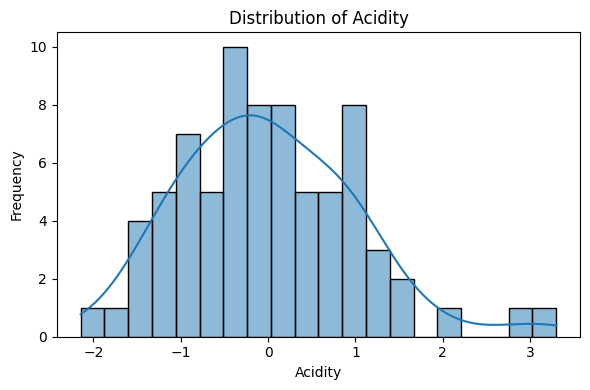

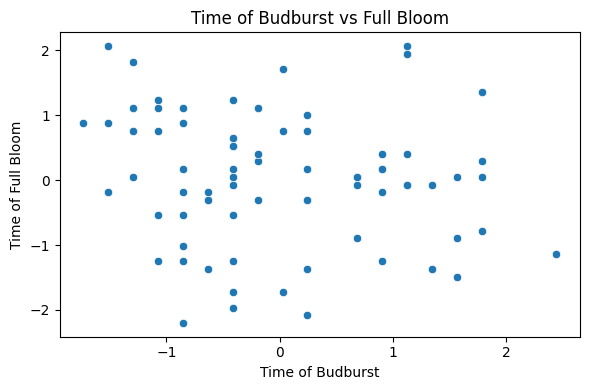

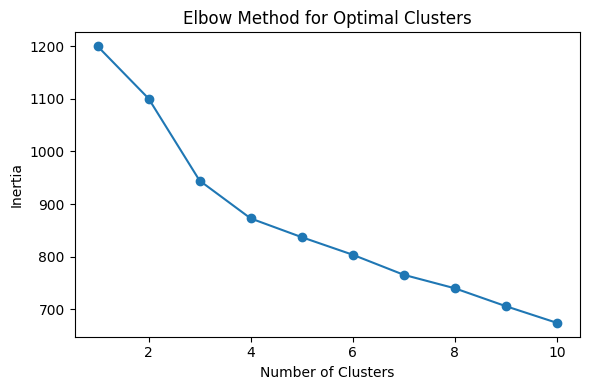

R^2 Score: 1.0
Mean Squared Error: 9.559289081301231e-31


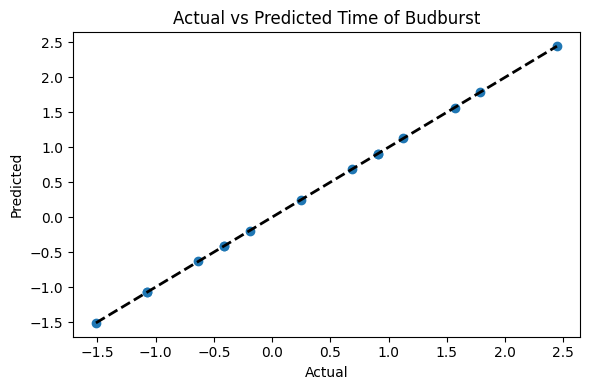

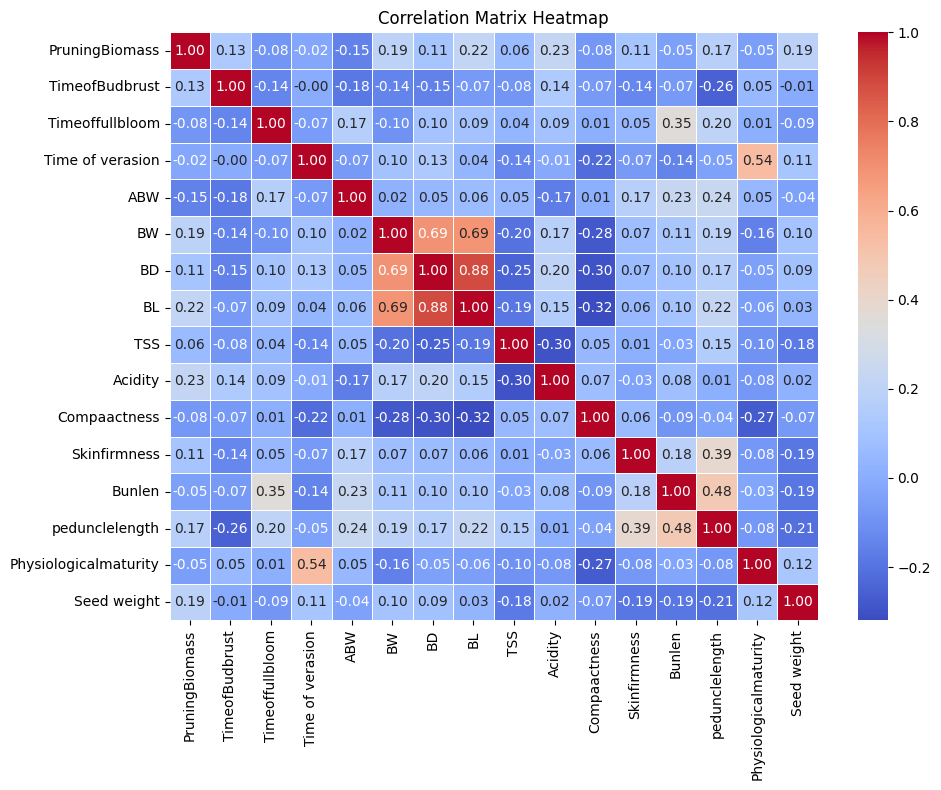

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Step 1: Load the Dataset
df = pd.read_csv("Analysis.csv")

# Step 2: Clean column names by stripping any leading/trailing spaces
df.columns = df.columns.str.strip()

# Step 3: Data Cleaning
# Drop the Unnamed index column
df = df.drop(columns=['Unnamed: 0'])

# Fill missing values with mean (only for numeric columns)
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Standardizing numerical features for clustering
features = ['PruningBiomass', 'TimeofBudbrust', 'Timeoffullbloom', 'Time of verasion',
            'ABW', 'BW', 'BD', 'BL', 'TSS', 'Acidity', 'Compaactness',
            'Skinfirmness', 'Bunlen', 'pedunclelength', 'Physiologicalmaturity',
            'Seed weight']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Step 4: Exploratory Data Analysis (EDA)

# 4a: Plot histogram of "Acidity"
plt.figure(figsize=(6, 4))
sns.histplot(df['Acidity'], kde=True, bins=20)
plt.title('Distribution of Acidity')
plt.xlabel('Acidity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('histogram_acidity.png')
plt.show()

# 4b: Scatter plot for "TimeofBudbrust" vs "Timeoffullbloom"
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['TimeofBudbrust'], y=df['Timeoffullbloom'])
plt.title('Time of Budburst vs Full Bloom')
plt.xlabel('Time of Budburst')
plt.ylabel('Time of Full Bloom')
plt.tight_layout()
plt.savefig('scatter_budburst_fullbloom.png')
plt.show()

# Step 5: K-means Clustering
# 5a: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[features])

# 5b: Elbow plot to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[features])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.savefig('elbow_plot.png')
plt.show()

# Step 6: Linear Regression Fitting
# 6a: Predict "TimeofBudbrust" using Linear Regression
X = df[features]
y = df['TimeofBudbrust']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# 6b: Predict and evaluate
y_pred = regressor.predict(X_test)

# Print evaluation metrics
print(f"R^2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

# Plotting the regression line
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Time of Budburst')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.tight_layout()
plt.savefig('regression_line.png')
plt.show()

corr_matrix = df[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.savefig('heatmap_correlation_matrix.png')
plt.show()